## Feature Engineering

Feature engineering is the process of using your own knowledge (transformations) <br>
about the data BEFORE it goes into the model 


In [443]:
# utils
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from numpy import sqrt, arctan2, array

def dataset_plot(X, Y):
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

def cartesian2polar(data):
    return array([(sqrt(x**2 + y**2), arctan2(y, x)) for x, y in data])



In [431]:
# logistic regression model
def logistic_regression(data, y, type_):
    from sklearn.linear_model import LogisticRegressionCV as LR
    from numpy import dot
    reg = LR().fit(data, y)
    b_0 = reg.intercept_
    b_1, b_2 = reg.coef_.T
    LR_predictions = reg.predict(data)
    print('\n{} accuracy of logistic regression: {}'"%"' of correctly labelled datapoints '.format('['+type_+']', int((dot(y, LR_predictions) + dot(1 - y, 1 - LR_predictions))/float(y.size)*100)))
    print('The logistic regression equation: y = ({:.4f}*x1) + ({:.4f}*x2) + ({:.4f})\n'.format(float(b_1), float(b_2), float(b_0)))
    return reg

def single_prediction(model, input):
    print("A single prediction of {} as input: ".format(str(input[0])))
    print("probability: {:.4f}".format(float(model.predict_proba(input)[:,1])))
    print("class %d" % model.predict(input))

For example, consider the following dataset:

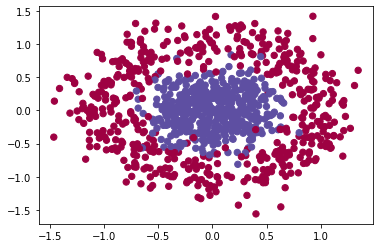

In [409]:
X, Y = make_circles(n_samples=1000, factor=.3, noise=.2)
dataset_plot(X, Y)

In terms of classification problem: <br>

**How can we separate these two classes (red and purple)?** <br> Foa, visualizing the data THIS WAY, should be clear that a linear model can not fit it properly. 

**What is the best model for it?** <br> 

* Artificial neural network? well... it works and [HERE](https://github.com/adilsonmedronha/Deeplearning_specialization/blob/main/1_Neural%20Networks%20and%20Deep%20Learning/w3_Shallow%20Neural%20Networks/Planar%20data%20classification%20with%20one%20hidden%20layer/Planar_data_classification_with_one_hidden_layer.ipynb) I developed a solution to this problem <br> using an ANN with four hidden layers. <br>
* But using ANN for this problem is to use more power than necessary... <br> Lets plot the same data in a different way to check (visually) if we can use another (and simpler) approach to classify... <br>

**Solution:** lets get the same data and convert it from cartesians to polar coordinates. <br> After the transformation, can a linear model fit well (or much better than ANN)?<br>

Run and see the visualization below

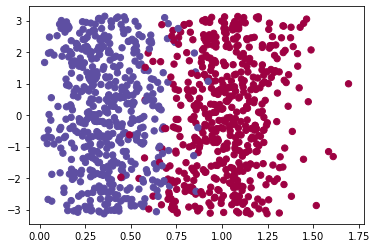

In [410]:
polars_coordinates = cartesian2polar(X)
dataset_plot(polars_coordinates, Y)

## Math exposition

\begin{equation} z = w^Tx+b \end{equation}

\begin{equation}
\tag{2}
f(x_{1},x_{2})=w_1x_{1}+w_2x_{2}+w_0
\end{equation}

\begin{equation}
\tag{3}
z = f
\end{equation}


<center>The logistic regression is given by:</center>


\begin{equation}
\tag{4}
\sigma (z) = \frac{1}{1+ e^{-z} }
\end{equation}

## Cartesian vs Polar coordinates
Using logistic regression on the same problem, but exploring two different ways to represent the data.


See in the end how bad a logistic regression model is when the data is not at its best representation.

### Logistic regression in Polar coordinates

Running...

In [433]:
lr = logistic_regression(polars_coordinates, Y, 'polar')


[polar] accuracy of logistic regression: 97% of correctly labelled datapoints 
The logistic regression equation: y = (-12.8078*x1) + (0.1203*x2) + (8.8311)



In [434]:
single_prediction(model=lr, input=[[0.4, 3]])

A single prediction of [0.4, 3] as input: 
probability: 0.9832
class 1


The equations 5 and 6 presents how to calculate the input point: (0.4, 3)

<center>Using our model (parameters) to calculate a single predicion by hand:</center>



\begin{equation}
\tag{5}
z = f(0.4, 3) = (-12.8078*0.4) + (0.1203*3) + 8.8311 \approx 4.0689
\end{equation}

\begin{equation}
\tag{6}
\sigma (z) = \frac{1}{1+ \frac{1}{e^{4.0689}}} \approx 0.9831
\end{equation}

---

### Logistic regression in Cartesian coordinates

Running...

In [444]:
lr = logistic_regression(X, Y, 'cartesian')


[cartesian] accuracy of logistic regression: 49% of correctly labelled datapoints 
The logistic regression equation: y = (0.0223*x1) + (-0.0397*x2) + (0.0003)



In [445]:
single_prediction(model=lr, input=[[0.4, 3]])

A single prediction of [0.4, 3] as input: 
probability: 0.4725
class 0


\begin{equation}
\tag{7}
\sigma (z) = \frac{1}{1+ e^{-[0.0223*0.4 -0.0397*3 + 0.0003]} } \approx 0.4725
\end{equation}